In [ ]:
#import libraries
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
y_test = pd.read_csv("/content/drive/MyDrive/Mall_Customers.csv")

In [ ]:
y_test.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
X = y_test.iloc[:, [3, 4]].to_numpy()

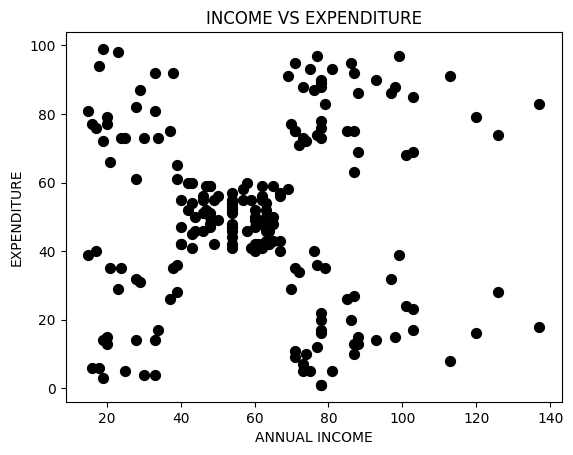

In [ ]:
plt.scatter(X[:,0], X[:,1], s=50, color="k")
plt.title("INCOME VS EXPENDITURE")
plt.xlabel("ANNUAL INCOME")
plt.ylabel("EXPENDITURE")
plt.show()

In [ ]:
class K_Means:
    def __init__(self, k=5, tol=0.001, max_iter=1000):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter

    def fit(self,data):

        self.centroids = {}
        cost=[]

        for i in range(self.k):
            self.centroids[i] = data[i]

        for i in range(self.max_iter):
            self.classifications = {}

            for i in range(self.k):
                self.classifications[i] = []

            for featureset in data:
                distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)

            prev_centroids = dict(self.centroids)

            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification],axis=0)
                original_centroid = prev_centroids[classification]
                current_centroid = self.centroids[classification]
                cost_ele=np.sum((current_centroid-original_centroid)/original_centroid*100.0)
                cost.append(cost_ele)
            optimized = True

            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]


                if np.sum((current_centroid-original_centroid)/original_centroid*100.0) > self.tol:
                    optimized = False

            if optimized:
                break
        plt.plot(np.arange(len(cost))*100, cost)
        plt.title("Cost vs Iteration")
        plt.xlabel("Iteration")
        plt.ylabel("Cost")
        plt.show()

    def predict(self,data):
        distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification


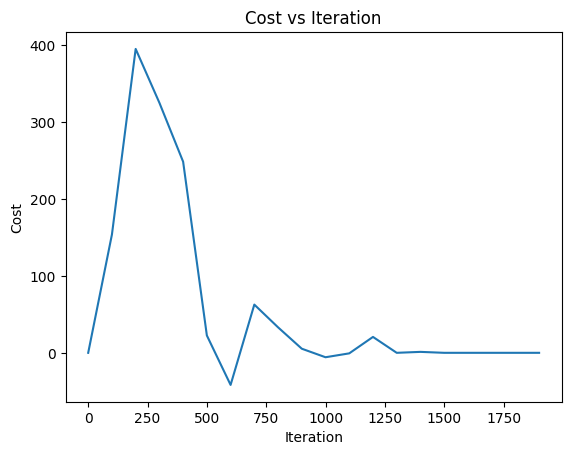

In [ ]:
model = K_Means()
model.fit(X)

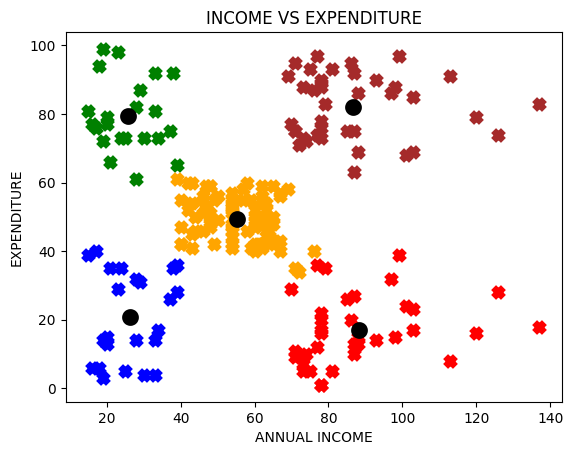

In [ ]:
colors=["blue","green","red","brown","orange"]


for classification in model.classifications:
    color = colors[classification]
    for featureset in model.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], marker="x", color=color, s=50, linewidths=5)


for centroid in model.centroids:
    plt.scatter(model.centroids[centroid][0], model.centroids[centroid][1],
                marker="o", color="k", s=50, linewidths=5)

plt.title("INCOME VS EXPENDITURE")
plt.xlabel("ANNUAL INCOME")
plt.ylabel("EXPENDITURE")
plt.show()